Instalación e importación de librerías

In [ ]:
!pip install -r requirements.txt -q

In [1]:
import pandas as pd
from importe_de_librerias import libraries_import
libraries_import()

## Ejercicio 1

Categorias elegidas
- Deporte
- Economía
- Salud
- Tecnología

In [ ]:
from Ejercicio1 import scrapping

scrapping() 
# FALTAN COSAS. 
# Esto no guarda nada en archivo.csv, pero me pierdo con tantos archivos. además hay que importar sus funciones tmb

## Ejercicio 2

In [2]:
from Ejercicio2 import splitting, get_sp_bert_embeddings, load_bert, training, evaluation, classify_new_phrases
df = pd.read_csv("archivo.csv")

Obtenemos los datos para el training del dataframe

In [3]:
xtrain, xtest, ytrain, ytest = splitting(df)

Elegimos usar un modelo BERT pre-entrenado en español para vectorizar los títulos para tener en cuenta los contextos de las palabras a la hora de clasificar los títulos

In [4]:
load_bert()
xtrain = get_sp_bert_embeddings(xtrain)
xtest = get_sp_bert_embeddings(xtest)

Some weights of BertModel were not initialized from the model checkpoint at dccuchile/bert-base-spanish-wwm-cased and are newly initialized: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Entrenamos el modelo de clasificación y lo evaluamos

In [5]:
modelo = training(xtrain, ytrain)
evaluation(modelo, xtest, ytest)

Precisión: 0.9166666666666666
Reporte de clasificación:
               precision    recall  f1-score   support

    deportes       1.00      1.00      1.00         7
    economia       0.80      1.00      0.89         4
       salud       1.00      0.67      0.80         3
       tecno       0.90      0.90      0.90        10

    accuracy                           0.92        24
   macro avg       0.92      0.89      0.90        24
weighted avg       0.92      0.92      0.91        24

Matriz de confusión:
[[7 0 0 0]
 [0 4 0 0]
 [0 0 2 1]
 [0 1 0 9]] 



Podemos ver que el modelo de regresión logística que obtuvimos da muy buenos resultados

In [7]:
classify_new_phrases(modelo, new_phrases = [
        "Boca pierde la final",
        "Nueva GPU en el mercado",
        "Nueva ola de Covid",
        "Massa se reúne con el presidente",
        "Clásico de Rosario",
        "Olimpiadas de invierno",
        "Dólares",
        "USD",
        "Dólares (USD)"
    ])

Clasificación predicha de 'Boca pierde la final': deportes
Clasificación predicha de 'Nueva GPU en el mercado': tecno
Clasificación predicha de 'Nueva ola de Covid': economia
Clasificación predicha de 'Massa se reúne con el presidente': economia
Clasificación predicha de 'Clásico de Rosario': economia
Clasificación predicha de 'Olimpiadas de invierno': deportes
Clasificación predicha de 'Dólares': tecno
Clasificación predicha de 'USD': tecno
Clasificación predicha de 'Dólares (USD)': economia
Clasificación predicha de 'USD a 1000 ARS': tecno
Clasificación predicha de 'Dólares (USD) a 1000 pesos': economia


Pero cuando probamos con frases inventadas por nosotros no obtenemos muy buenos resultados. 

La tercera, quinta, y penúltimas frases son clasificadas erróneamente.

Lo del Covid y el clásico puede deberse a una falta de noticias sobre esos temas últimamente, pero como veremos en el siguiente ejercicio, las palabras "dólares" y "usd" son de las más comunes en la categoría economía y desconcierta que no pueda clasificarlas bien a menos que las pongamos una vez a cada una.

## Ejercicio 3

In [3]:
from Ejercicio3 import df2texts, texts_normalization, wordcloud, texts2freqs, top_freqs
df = pd.read_csv('archivo.csv')

Hacemos un diccionario con los textos de cada noticia por categoría y realizamos el proceso de normalización y limpieza del mismo

In [4]:
textos = df2texts(df)
textos = texts_normalization(textos)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Patricio\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Patricio\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Hacemos un diccionario de diccionarios de frecuencias para cada palabra, para cada categoría

In [5]:
freqs = texts2freqs(textos)

Comparamos las nubes de palabras con las 5 palabras más frecuentes (ignorando stopwords)

5 palabras más frecuentes de economia:
{'mercado': 54, 'precios': 52, 'usd': 46, 'año': 45, 'argentina': 44}


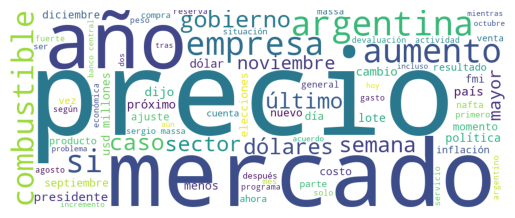

In [6]:
top_freqs(freqs, "economia")
wordcloud(textos, "economia")

5 palabras más frecuentes de tecno:
{'usuarios': 137, 'puede': 82, 'si': 68, 'pueden': 58, 'forma': 57}


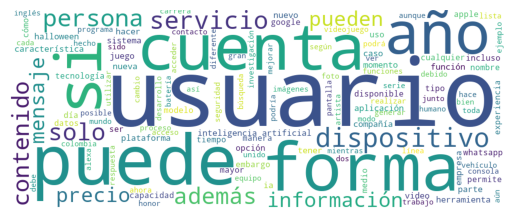

In [7]:
top_freqs(freqs, "tecno")
wordcloud(textos, "tecno")

5 palabras más frecuentes de salud:
{'leucemia': 80, 'acv': 74, 'puede': 61, 'personas': 55, 'síntomas': 50}


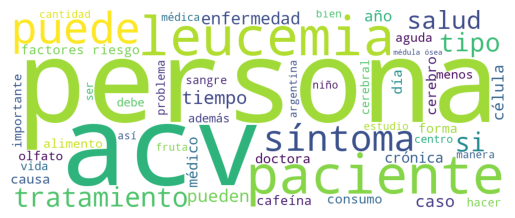

In [8]:
top_freqs(freqs, "salud")
wordcloud(textos, "salud")

5 palabras más frecuentes de deportes:
{'equipo': 58, 'final': 56, 'minutos': 50, 'luego': 49, 'partido': 47}


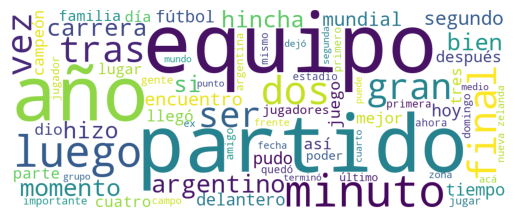

In [10]:
top_freqs(freqs, "deportes")
wordcloud(textos, "deportes")

Podemos ver que ambas funciones nos dicen información similar de cada categoría, aunque el algoritmo de las wordcloud es más complejo, y tiene en cuenta también el largo de las palabras a la hora de darles un tamaño, favoreciendo a veces las más cortas

## Ejercicio 4

In [15]:
from Ejercicio4 import leer_filtrar, heatmap_sim, pca_2d, pca_3d

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Patricio\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Patricio\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [16]:
#VV   ELIGE LA CATEGORIA A ANALIZAR   VV
categoria_analizar = "economia"
#VV   ELIGE LA ruta de tu archivo csv que contiene las noticias A ANALIZAR   VV
path = "archivo.csv"

In [17]:
#traemos los titulos filtrados y no filtrados
title_no_filtrado, title_filtrado = leer_filtrar(categoria_analizar, path)

Vamos a analizar la relación/similitud entre los títulos de una categoría específica.

Para esto realizamos graficos de correlación y aplicamos PCA para observar en 2 y 3 dimensiones la distancias entre los títulos.

Este proceso lo realizaremos con los titulos procesados, eliminándoles puntuaciones y stopwords, y los títulos sin procesamiento anterior para observar diferencias.

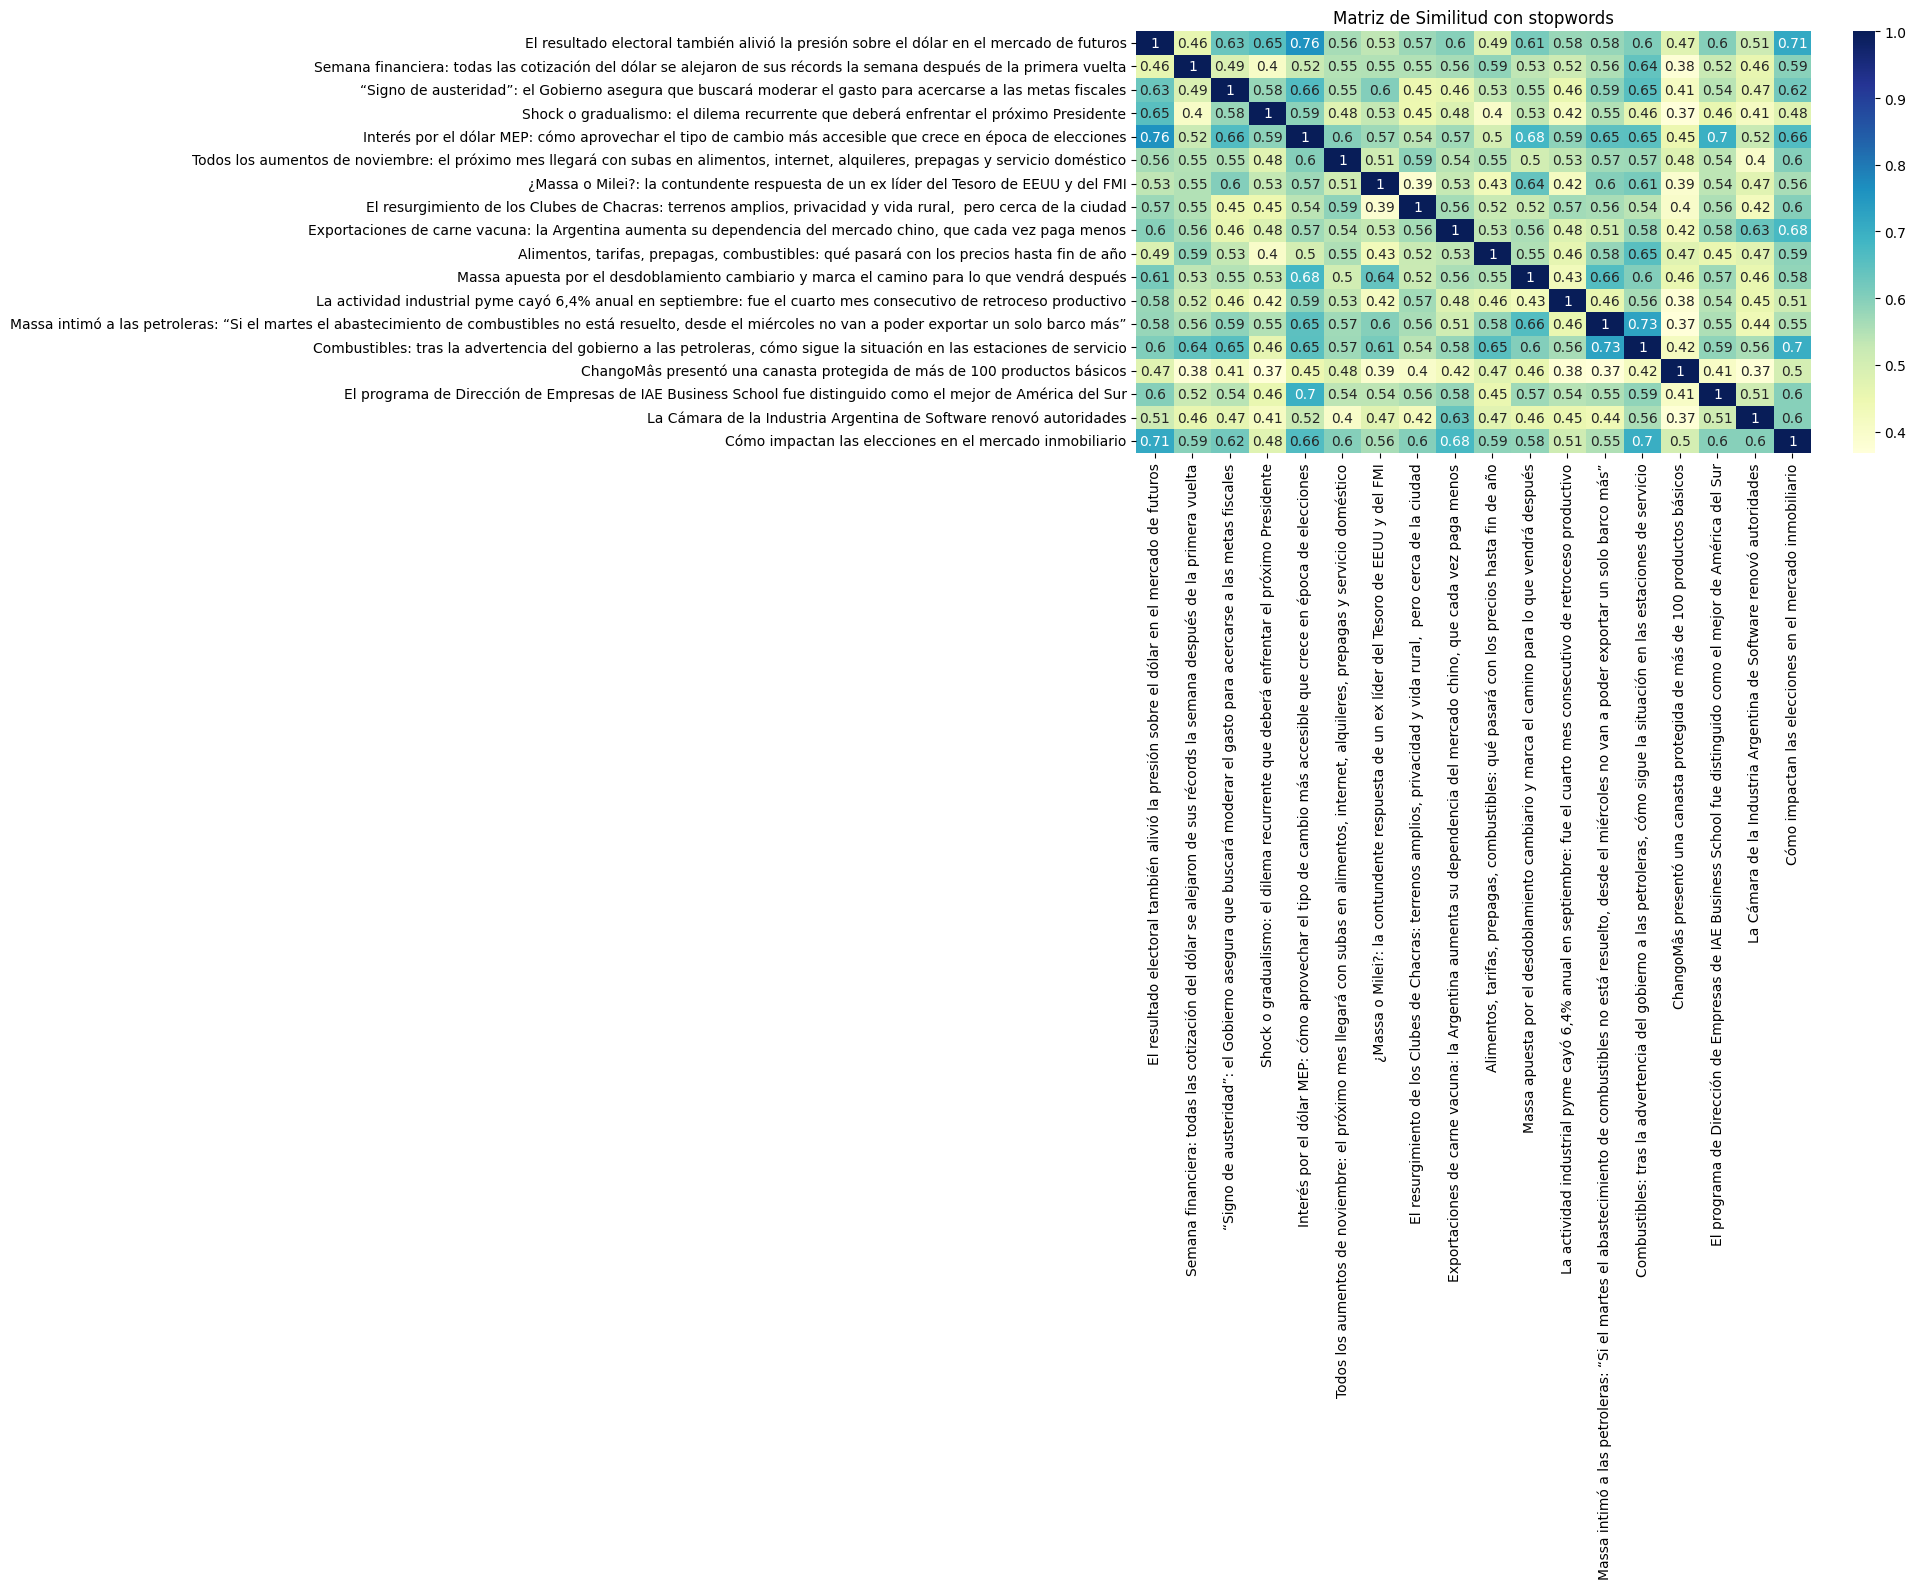

In [18]:
heatmap_sim(title_no_filtrado, "Matriz de Similitud con stopwords")

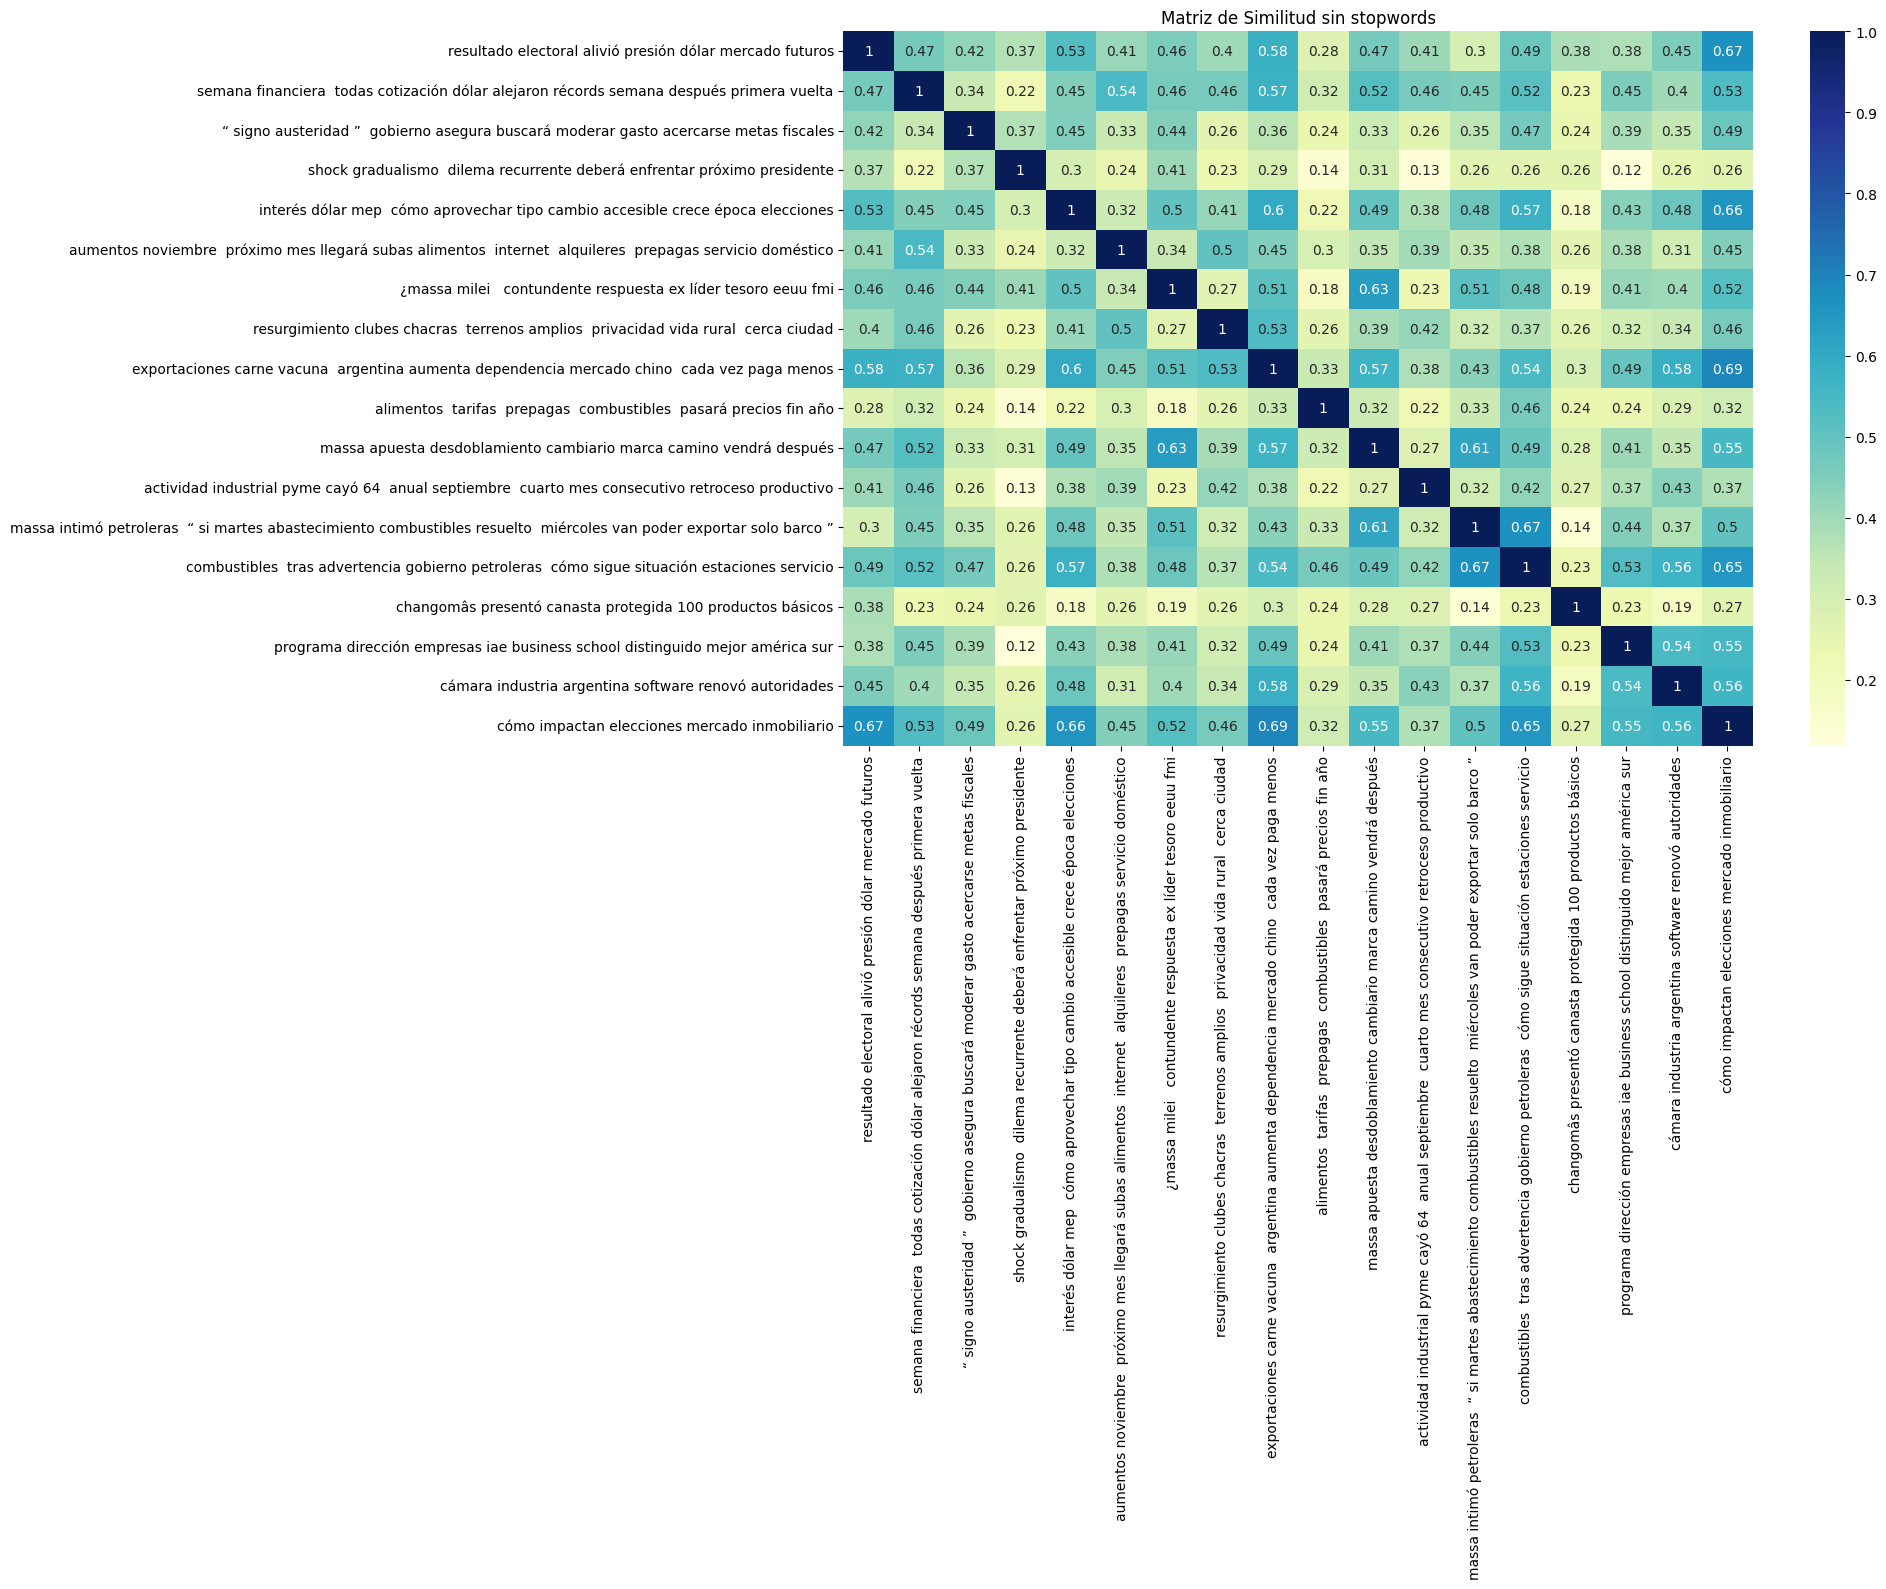

In [19]:
heatmap_sim(title_filtrado, "Matriz de Similitud sin stopwords")

Análisis dimensional utilizando PCA para reducir las dimensiones y poder visualizar gráficos

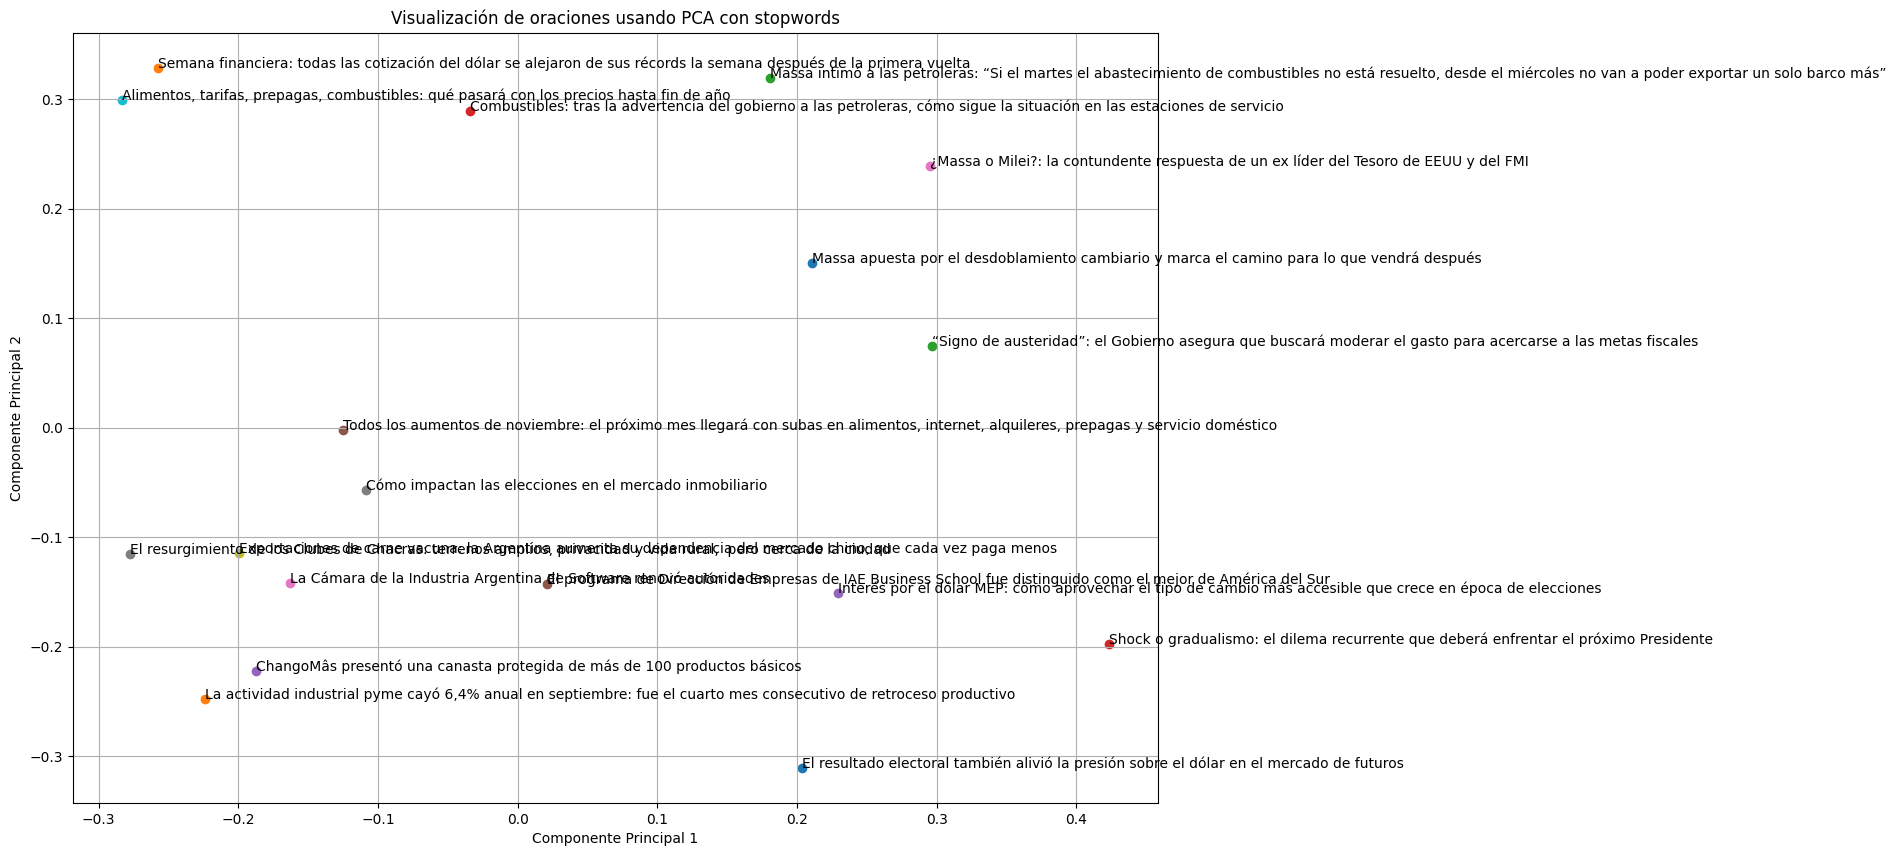

In [20]:
pca_2d(title_no_filtrado, 'Visualización de oraciones usando PCA con stopwords')

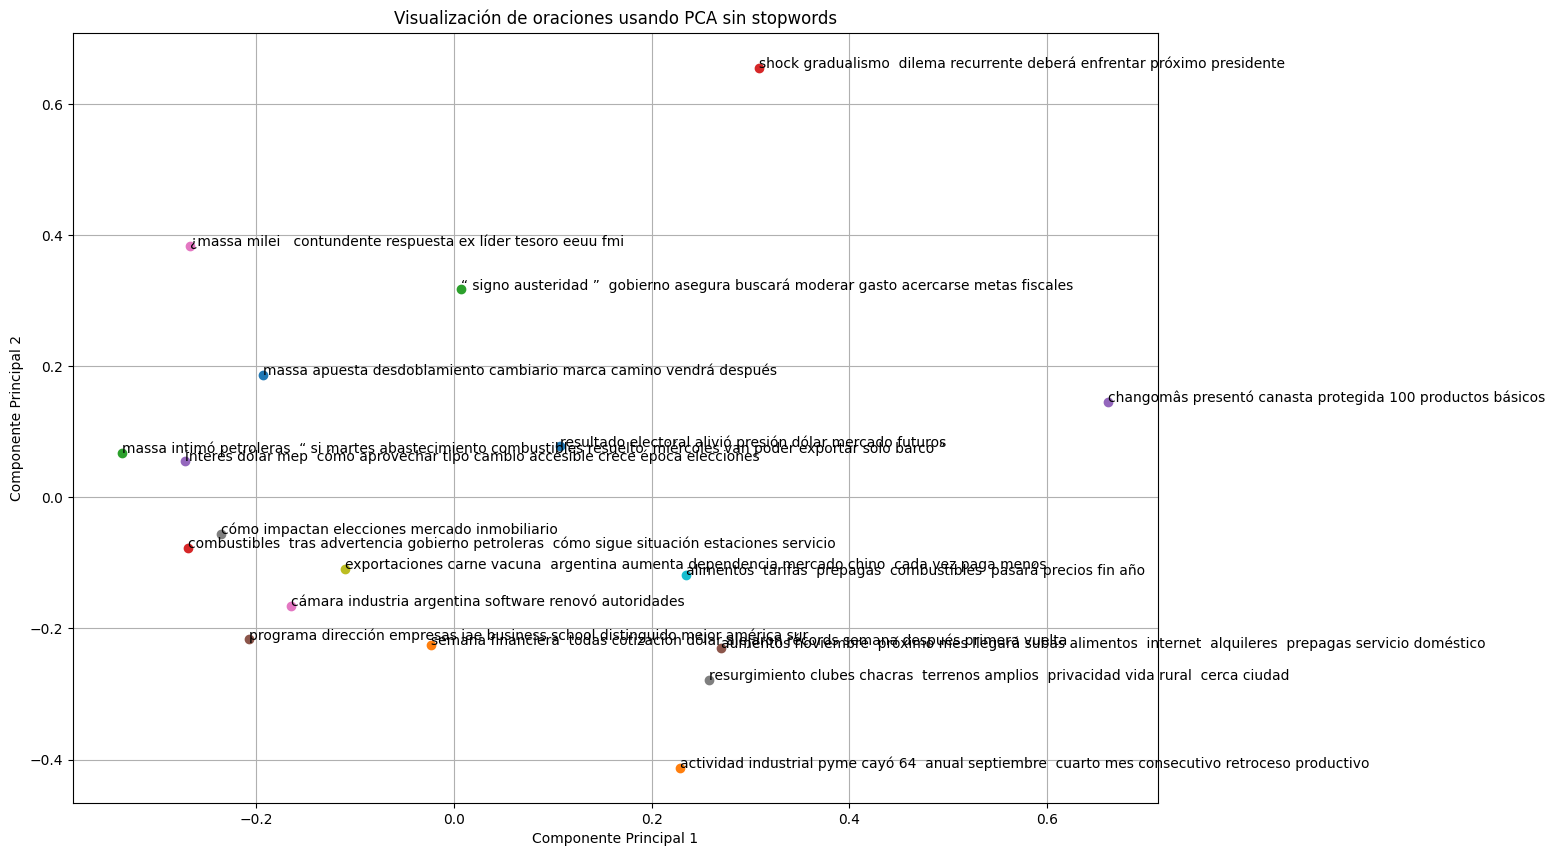

In [21]:
pca_2d(title_filtrado, 'Visualización de oraciones usando PCA sin stopwords')

In [22]:
pca_3d(title_no_filtrado, "Visualización en 3D con PCA c/stopwords")

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

In [ ]:
pca_3d(title_filtrado, "Visualización en 3D con PCA s/stopwords")

El principal problema que observamos, ya que los resultados no son los mejores que podríamos obtener, se da por la reducida cantidad de datos que tenemos en nuestro modelo.

Podríamos obtener más noticias por categoría, obteniendo un corpus de títulos mayor, para poder realizar un modelo más completo y óptimo.

Otra limitación que pensamos es en las limitaciones semánticas de este modelo, ya que dos títulos podrían ser similares a nivel de palabras u oraciones pero tener matices diferentes. Por lo tanto, la similitud calculada por los modelos de embedding es una medida semántica, pero no necesariamente una medida de relevancia o equivalencia en sentido estricto.

Los modelos de embedding pueden tener dificultades para capturar similitud en títulos que contienen palabras poco comunes o jerga específica de una industria o campo. Estas palabras pueden no estar bien representadas en el corpus de entrenamiento.